# Initialize notebook

In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
from IPython.display import display

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import os

project_root = '/content/gdrive/My Drive/datasets/eleicoesPE'

os.listdir(project_root)

['consulta_cand_2022_PE.csv',
 'intermediate',
 'votacao_secao_2022_PE.csv',
 'PE_Malha_Preliminar_2022.json']

# Data preprocessing
* Group and sum the election results by Municipio
* Dissolve the census sectors by Municipio and filter out non-relevant columns (higher than state-level aggregation and urban sprawl flag)

In [ ]:
votacao_PE = pd.read_csv(f"{project_root}/votacao_secao_2022_PE.csv", delimiter=";", encoding="latin 1")
print(votacao_PE.shape)
votacao_PE.columns

(2763316, 26)


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [ ]:
cols = ['NR_TURNO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'CD_CARGO', 'NR_VOTAVEL', 'SQ_CANDIDATO', 'QT_VOTOS']
cols_ = ['NR_TURNO', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'CD_CARGO', 'NR_VOTAVEL', 'SQ_CANDIDATO']

vot_PE = votacao_PE[cols]
vot_PE = vot_PE.groupby(cols_, as_index=False)['QT_VOTOS'].sum()
vot_PE.columns = ['NR_TURNO', 'CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_VOTAVEL', 'SQ_CANDIDATO', 'QT_VOTOS']
vot_PE.to_csv(f"{project_root}/intermediate/votacao_secao_2022_PE_abrev.csv", index=False)

In [ ]:
malha_PE = gpd.read_file(f'{project_root}/PE_Malha_Preliminar_2022.json')
malha_PE['v0001'] = malha_PE['v0001'].astype(int)
print(malha_PE.shape)
malha_PE.columns

(17574, 30)


Index(['CD_SETOR', 'AREA_KM2', 'CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF',
       'CD_MUN', 'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST',
       'CD_MICRO', 'NM_MICRO', 'CD_MESO', 'NM_MESO', 'CD_RGI', 'NM_RGI',
       'CD_RGINT', 'NM_RGINT', 'CD_CONCURB', 'NM_CONCURB', 'v0001', 'v0002',
       'v0003', 'v0004', 'v0005', 'v0006', 'v0007', 'geometry'],
      dtype='object')

In [ ]:
cols = ['CD_MUN', 'NM_MUN', 'CD_MICRO', 'NM_MICRO', 'CD_MESO',
        'NM_MESO', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT', 'v0001', 'geometry']
cols_ = ['NM_MUN', 'CD_MICRO', 'NM_MICRO', 'CD_MESO',
        'NM_MESO', 'CD_RGI', 'NM_RGI', 'CD_RGINT', 'NM_RGINT']

agg_dict = {
    item: 'first' for item in cols_
}

agg_dict['v0001'] = 'sum'

malha_PE_abrev = malha_PE[cols].dissolve(by='CD_MUN', aggfunc=agg_dict, as_index=False)
malha_PE_abrev[cols]

malha_PE_abrev.to_file(f'{project_root}/intermediate/malha_PE_abrev.geojson', driver='GeoJSON')

In [ ]:
cand_PE = pd.read_csv(f"{project_root}/consulta_cand_2022_PE.csv", delimiter=";", encoding="latin 1")
print(cand_PE.shape)
cand_PE.columns

(1142, 50)


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [ ]:
situacao_cand_key = cand_PE[['CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA']].drop_duplicates()
situacao_eleicao_key = cand_PE[['CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO']].drop_duplicates()

# TODO: collect gender, education, racial data in order to allow for filtering candidates by those traits
# cols = ['NR_TURNO', 'CD_CARGO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CANDIDATO', 'CD_SITUACAO_CANDIDATURA', 'CD_SIT_TOT_TURNO']
cols = ['NR_TURNO', 'CD_CARGO', 'SQ_CANDIDATO', 'NM_URNA_CANDIDATO', 'NM_CANDIDATO', 'NR_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'CD_SITUACAO_CANDIDATURA', 'CD_SIT_TOT_TURNO']


cand_PE_abrev = cand_PE[cols].copy()
# cand_PE_abrev['NM_SOCIAL_CANDIDATO'] = cand_PE_abrev['NM_SOCIAL_CANDIDATO'].apply(lambda x: np.nan if '#' in x else x)
cand_PE_abrev.to_csv(f"{project_root}/intermediate/cand_2022_PE_abrev.csv", index=False)
cand_PE_abrev[cand_PE_abrev['NR_TURNO'] == 1].head()

NR_TURNO  CD_CARGO  SQ_CANDIDATO NM_URNA_CANDIDATO  \
0         1         7  170001727901     JOSAFÁ ARAÚJO   
1         1         6  170001723579      DANIEL UCHOA   
2         1         6  170001595471  PROFESSOR SAMUEL   
3         1         3  170001601203   CLAUDIA RIBEIRO   
4         1         6  170001609073    IRMAO OSINALDO   

                      NM_CANDIDATO  NR_CANDIDATO  NR_PARTIDO     SG_PARTIDO  \
0            JOSAFA JOSE DE ARAUJO         18523          18           REDE   
1        DANIEL TADEU UCHOA MATEUS          7766          77  SOLIDARIEDADE   
2  SAMUEL JOSE TAVARES DE OLIVEIRA          1045          10   REPUBLICANOS   
3          CLAUDIA MACHADO RIBEIRO            16          16           PSTU   
4       OSINALDO VALDEMAR DE SOUZA          2299          22             PL   

   CD_SITUACAO_CANDIDATURA  CD_SIT_TOT_TURNO  
0                       12                 5  
1                       12                 5  
2                       12                 5  
3                       12                 4  
4                       12                 5

# Load preprocessed data


In [ ]:
voto_PE_abrev = pd.read_csv(f"{project_root}/intermediate/votacao_secao_2022_PE_abrev.csv")
malha_PE_abrev = gpd.read_file(f'{project_root}/intermediate/malha_PE_abrev.geojson')
cand_PE_abrev = pd.read_csv(f"{project_root}/intermediate/cand_2022_PE_abrev.csv")

# Fix and fill data
* TSE (electoral court) and IBGE (geography and statistics institute) both use codes for Municipios, but the systems are no compatible; fuzzy matching by municipio name allows us to assign the IBGE codes to the municipios in the electoral results
* Compute the total votes and total valid votes for each municipio to calculate metrics for candidates
* Separate the data of interest: nominal votes and legend (party) votes
* Filter municipio geographic data to only contain IBGE code, name and shapes

In [ ]:
try:
  from rapidfuzz import process, fuzz
except:
  !pip install rapidfuzz -q
  from rapidfuzz import process, fuzz

# municipios ground truth
municipios_gt = malha_PE_abrev[['CD_MUN','NM_MUN']].drop_duplicates()
municipios_gt['NM_MUN'] = municipios_gt['NM_MUN'].str.lower().str.strip()

match_dict = {}

def fuzzy_match(mun_name, mun_df, min_score=80):
    if mun_name in match_dict:
        return match_dict[mun_name]
    best_match = process.extractOne(mun_name.lower().strip(), mun_df['NM_MUN'], scorer=fuzz.ratio, score_cutoff=min_score)
    if best_match:
        matched_row = mun_df[mun_df['NM_MUN'] == best_match[0]]
        code = matched_row['CD_MUN'].values[0]
        match_dict[mun_name] = code
        return code
    return None

voto_PE_corr = voto_PE_abrev.copy()
display(voto_PE_corr.head())
voto_PE_corr['CD_MUN'] = voto_PE_corr['NM_MUN'].apply(lambda x: fuzzy_match(x, municipios_gt))
voto_PE_corr.drop(columns=['NM_MUN'], inplace=True)
voto_PE_corr = voto_PE_corr[['CD_MUN', 'NR_TURNO', 'CD_CARGO', 'NR_VOTAVEL', 'SQ_CANDIDATO', 'QT_VOTOS']]

display(voto_PE_corr.head())

voto_PE_corr.to_csv(f"{project_root}/intermediate/votacao_secao_2022_PE_corr.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.0 MB/s eta 0:00:00


NR_TURNO  CD_MUN   NM_MUN  CD_CARGO  NR_VOTAVEL  SQ_CANDIDATO  QT_VOTOS
0         1   23000  QUIXABA         3          14  170001618273         7
1         1   23000  QUIXABA         3          22  170001602587       213
2         1   23000  QUIXABA         3          40  170001618087      1011
3         1   23000  QUIXABA         3          44  170001604111      2044
4         1   23000  QUIXABA         3          45  170001604087        56

CD_MUN  NR_TURNO  CD_CARGO  NR_VOTAVEL  SQ_CANDIDATO  QT_VOTOS
0  2611533         1         3          14  170001618273         7
1  2611533         1         3          22  170001602587       213
2  2611533         1         3          40  170001618087      1011
3  2611533         1         3          44  170001604111      2044
4  2611533         1         3          45  170001604087        56

In [ ]:
voto_PE_total = voto_PE_corr.groupby(['CD_CARGO', 'NR_TURNO', 'CD_MUN'], as_index=False).agg({'QT_VOTOS': 'sum'})
voto_PE_valido = voto_PE_corr[voto_PE_corr['SQ_CANDIDATO'] != -1].groupby(['CD_CARGO', 'NR_TURNO', 'CD_MUN'], as_index=False).agg({'QT_VOTOS': 'sum'})
voto_PE_nominal = voto_PE_corr[(voto_PE_corr['SQ_CANDIDATO'] != -1) | (voto_PE_corr['SQ_CANDIDATO'] == -3)]
voto_PE_legenda = voto_PE_corr[voto_PE_corr['SQ_CANDIDATO'] == -3]

voto_PE_nominal

CD_MUN  NR_TURNO  CD_CARGO  NR_VOTAVEL  SQ_CANDIDATO  QT_VOTOS
0      2611533         1         3          14  170001618273         7
1      2611533         1         3          22  170001602587       213
2      2611533         1         3          40  170001618087      1011
3      2611533         1         3          44  170001604111      2044
4      2611533         1         3          45  170001604087        56
...        ...       ...       ...         ...           ...       ...
83411  2600054         2         3          77  170001610442     22243
83414  2607752         2         3          45  170001604087      7146
83415  2607752         2         3          77  170001610442      7902
83418  2605459         2         3          45  170001604087      1396
83419  2605459         2         3          77  170001610442       440

[81570 rows x 6 columns]

In [ ]:
malha_PE_mun = malha_PE_abrev[['CD_MUN', 'NM_MUN', 'geometry']].copy()
malha_PE_mun.head()

CD_MUN                 NM_MUN  \
0  2600054           Abreu e Lima   
1  2600104  Afogados da Ingazeira   
2  2600203                Afrânio   
3  2600302              Agrestina   
4  2600401             Água Preta   

                                            geometry  
0  POLYGON ((-34.92115 -7.92888, -34.92178 -7.929...  
1  POLYGON ((-37.60467 -7.86002, -37.60408 -7.861...  
2  POLYGON ((-41.04232 -8.78402, -41.04393 -8.784...  
3  POLYGON ((-35.94532 -8.53637, -35.9476 -8.5351...  
4  POLYGON ((-35.55924 -8.83185, -35.55924 -8.831...

# Saving to file the components necessary for nominal rendering

In [44]:
cand_PE_abrev.to_csv(f"{project_root}/render/cand_2022_PE_abrev.csv", index=False)
voto_PE_nominal.to_csv(f"{project_root}/render/votacao_mun_2022_PE_nominal.csv", index=False)
voto_PE_valido.to_csv(f"{project_root}/render/votacao_mun_2022_PE_valido.csv", index=False)
malha_PE_mun.to_file(f"{project_root}/render/malha_PE_mun.geojson", driver='GeoJSON')

# Rendering nominal data

In [ ]:
voto_PE_nominal = pd.read_csv(f"{project_root}/render/votacao_mun_2022_PE_nominal.csv")
voto_PE_valido = pd.read_csv(f"{project_root}/render/votacao_mun_2022_PE_valido.csv")
malha_PE_mun = gpd.read_file(f"{project_root}/render/malha_PE_mun.geojson")

In [43]:
turno_choice = 1
cargo_choice = 7
votavel_choice = 13113

voto_select = voto_PE_nominal[(voto_PE_nominal['NR_TURNO'] == turno_choice) & (voto_PE_nominal['CD_CARGO'] == cargo_choice) & (voto_PE_nominal['NR_VOTAVEL'] == votavel_choice)].copy()
voto_cand_total = voto_select['QT_VOTOS'].sum()
voto_select = voto_select.merge(voto_PE_valido[(voto_PE_valido['CD_CARGO'] == cargo_choice) & (voto_PE_valido['NR_TURNO'] == turno_choice)][['CD_MUN', 'QT_VOTOS']], on='CD_MUN', how='left', suffixes=('_CAND_LOCAL', '_VALIDOS_LOCAL')).fillna(0)
voto_select['FREQ_LOCAL'] = np.round(voto_select['QT_VOTOS_CAND_LOCAL'] / voto_select['QT_VOTOS_VALIDOS_LOCAL'] * 100, 2)
voto_select['INCID_LOCAL'] = np.round(voto_select['QT_VOTOS_CAND_LOCAL'] / voto_cand_total * 100, 2)

voto_display = gpd.GeoDataFrame(voto_select.merge(malha_PE_mun, on='CD_MUN', how='outer').fillna(0))

# voto_display

In [ ]:
try:
  import folium
except:
  !pip install folium -q
  import folium

import branca.colormap as cm

m = folium.Map([-8.319639, -37.635917], zoom_start=8)

cmap_freq = cm.linear.YlOrRd_04.scale(voto_display['FREQ_LOCAL'].min(), voto_display['FREQ_LOCAL'].max())
cmap_freq.caption = '% dos votos no município'

cmap_incid = cm.linear.YlOrRd_04.scale(voto_display['INCID_LOCAL'].min(), voto_display['INCID_LOCAL'].max())
cmap_incid.caption = '% dos votos da candidatura'

freq_geojson = folium.GeoJson(voto_display,
               style_function=lambda feature: {
                   'fillColor': cmap_freq(feature['properties']['FREQ_LOCAL']),
                   'fillOpacity': 0.9,
                   'color': 'black',
                   'weight': 0.7,
                   'opacity': 0.5,
               },
               tooltip=folium.GeoJsonTooltip(fields=['NM_MUN', 'QT_VOTOS_CAND_LOCAL', 'FREQ_LOCAL', 'INCID_LOCAL'], aliases=['Município', 'N. votos', '% no Município', '% dos votos cand.']),
               name='% dos votos no município',
               )

layer_freq = folium.FeatureGroup(name='Frequência', show=True).add_to(m)
freq_geojson.add_to(layer_freq)
cmap_freq.add_to(m)

incid_geojson = folium.GeoJson(voto_display,
               style_function=lambda feature: {
                   'fillColor': cmap_incid(feature['properties']['INCID_LOCAL']),
                   'fillOpacity': 0.9,
                   'color': 'black',
                   'weight': 0.7,
                   'opacity': 0.5,
               },
               tooltip=folium.GeoJsonTooltip(fields=['NM_MUN', 'QT_VOTOS_CAND_LOCAL', 'FREQ_LOCAL', 'INCID_LOCAL'], aliases=['Município', 'N. votos', '% no Município', '% dos votos cand.']),
               name='% dos votos da candidatura',
               )

layer_incid = folium.FeatureGroup(name='Candidatura', show=False).add_to(m)
incid_geojson.add_to(layer_incid)
cmap_incid.add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
m.save('map.html')

# TO REVIEW

In [ ]:
votos_validos = voto_PE_corr[~((voto_PE_corr['NR_VOTAVEL'] == 95) | (voto_PE_corr['NR_VOTAVEL'] == 96))].groupby(['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO'], as_index=False)['QT_VOTOS'].sum()
votos_totais = voto_PE_corr.groupby(['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO'], as_index=False)['QT_VOTOS'].sum()

voto_total_local = pd.merge(votos_validos, votos_totais, on=['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO'], how='outer')
voto_total_local.columns = ['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO', 'QT_VOTOS_VALIDOS', 'QT_VOTOS_TOTAL']
voto_total_local['PERC_VOTOS_VALIDOS'] = voto_total_local['QT_VOTOS_VALIDOS'] / voto_total_local['QT_VOTOS_TOTAL'] * 100
voto_total_local

CD_MUN        NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS_VALIDOS  \
0    2600054  ABREU E LIMA         3         1             58604   
1    2600054  ABREU E LIMA         3         2             63642   
2    2600054  ABREU E LIMA         5         1             53485   
3    2600054  ABREU E LIMA         6         1             58229   
4    2600054  ABREU E LIMA         7         1             58797   
..       ...           ...       ...       ...               ...   
921  2616506         XEXÉU         3         1              6433   
922  2616506         XEXÉU         3         2              7054   
923  2616506         XEXÉU         5         1              5910   
924  2616506         XEXÉU         6         1              7066   
925  2616506         XEXÉU         7         1              6932   

     QT_VOTOS_TOTAL  PERC_VOTOS_VALIDOS  
0             68900           85.056604  
1             69586           91.458052  
2             68900           77.626996  
3             68900           84.512337  
4             68900           85.336720  
..              ...                 ...  
921            7800           82.474359  
922            7771           90.773388  
923            7800           75.769231  
924            7800           90.589744  
925            7800           88.871795  

[926 rows x 7 columns]

In [ ]:
# Group voto_PE_corr by SQ_CANDIDATO and NR_TURNO and calculate the sum of votes (QT_VOTOS) for each candidate
voto_summary = voto_PE_corr.groupby(['SQ_CANDIDATO', 'NR_TURNO'], as_index=False)['QT_VOTOS'].sum()

# Merge the summed votes back into the cand_PE_abrev dataframe based on SQ_CANDIDATO and NR_TURNO
voto_total_cand = cand_PE_abrev.merge(voto_summary, on=['SQ_CANDIDATO', 'NR_TURNO'], how='left')

# Rename QT_VOTOS to TOTAL_VOTOS for clarity
voto_total_cand.rename(columns={'QT_VOTOS': 'TOTAL_VOTOS_CAND'}, inplace=True)

# If there are any candidates without votes, fill missing TOTAL_VOTOS with 0
voto_total_cand['TOTAL_VOTOS_CAND'] = voto_total_cand['TOTAL_VOTOS_CAND'].fillna(0).astype(int)

voto_total_cand

NR_TURNO  CD_CARGO  SQ_CANDIDATO NM_URNA_CANDIDATO  \
0            1         7  170001727901     JOSAFÁ ARAÚJO   
1            1         6  170001723579      DANIEL UCHOA   
2            1         6  170001595471  PROFESSOR SAMUEL   
3            1         3  170001601203   CLAUDIA RIBEIRO   
4            1         6  170001609073    IRMAO OSINALDO   
...        ...       ...           ...               ...   
1137         1         6  170001610575    FABÍOLA CABRAL   
1138         1         7  170001605482    DEBORA ALMEIDA   
1139         1         6  170001604099   GLAUCIA ANDRADE   
1140         1         4  170001715591    RALINE ALMEIDA   
1141         1         7  170001608965    SUZI RODRIGUES   

                                 NM_CANDIDATO  NR_CANDIDATO  NR_PARTIDO  \
0                       JOSAFA JOSE DE ARAUJO         18523          18   
1                   DANIEL TADEU UCHOA MATEUS          7766          77   
2             SAMUEL JOSE TAVARES DE OLIVEIRA          1045          10   
3                     CLAUDIA MACHADO RIBEIRO            16          16   
4                  OSINALDO VALDEMAR DE SOUZA          2299          22   
...                                       ...           ...         ...   
1137         FABÍOLA KARLA DE OLIVEIRA MACIEL          7777          77   
1138        DEBORA LUZINETE DE ALMEIDA SEVERO         45555          45   
1139  GLAUCIA KAMILA ANDRADE RIBEIRO DA SILVA          4500          45   
1140                RALINE SANTANA DE ALMEIDA            21          21   
1141          SUZINEIDE RODRIGUES DE MEDEIROS         13000          13   

         SG_PARTIDO  CD_SITUACAO_CANDIDATURA  CD_SIT_TOT_TURNO  \
0              REDE                       12                 5   
1     SOLIDARIEDADE                       12                 5   
2      REPUBLICANOS                       12                 5   
3              PSTU                       12                 4   
4                PL                       12                 5   
...             ...                      ...               ...   
1137  SOLIDARIEDADE                       12                 5   
1138           PSDB                       12                 2   
1139           PSDB                       12                 4   
1140            PCB                       12                 4   
1141             PT                       12                 5   

      TOTAL_VOTOS_CAND  
0                  205  
1                 1851  
2                  809  
3                 1745  
4                 3635  
...                ...  
1137             40638  
1138             51282  
1139              5197  
1140                 0  
1141             11266  

[1142 rows x 11 columns]

# Plotting data
* preload the geodata by aggregation
* select data in such a way to only have one or zero rows of electoral data per municipio

In [ ]:
# preload aggregated geodata
malha_PE_mun = malha_PE_abrev[['CD_MUN', 'geometry']].copy()
# TODO: rest of aggregations

In [ ]:
partido_key = cand_PE_abrev[['NR_PARTIDO', 'SG_PARTIDO']].drop_duplicates()
partido_key = {row['SG_PARTIDO']: row['NR_PARTIDO'] for _, row in partido_key.iterrows()}
print(partido_key)
print(sorted(list(partido_key.keys())))

{'REDE': 18, 'SOLIDARIEDADE': 77, 'REPUBLICANOS': 10, 'PSTU': 16, 'PL': 22, 'UNIÃO': 44, 'PSB': 40, 'AGIR': 36, 'PROS': 90, 'PRTB': 28, 'AVANTE': 70, 'DC': 27, 'PDT': 12, 'PMN': 33, 'PP': 11, 'PSDB': 45, 'PC do B': 65, 'PSOL': 50, 'PT': 13, 'PATRIOTA': 51, 'PCO': 29, 'CIDADANIA': 23, 'PTB': 14, 'MDB': 15, 'PODE': 19, 'PMB': 35, 'NOVO': 30, 'PV': 43, 'PCB': 21, 'PSD': 55, 'PSC': 20, 'UP': 80}
['AGIR', 'AVANTE', 'CIDADANIA', 'DC', 'MDB', 'NOVO', 'PATRIOTA', 'PC do B', 'PCB', 'PCO', 'PDT', 'PL', 'PMB', 'PMN', 'PODE', 'PP', 'PROS', 'PRTB', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSOL', 'PSTU', 'PT', 'PTB', 'PV', 'REDE', 'REPUBLICANOS', 'SOLIDARIEDADE', 'UNIÃO', 'UP']


CD_MUN                  NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS
0    2600054            ABREU E LIMA         7         1        38
1    2600104   AFOGADOS DA INGAZEIRA         7         1         6
2    2600203                 AFRÂNIO         7         1         2
3    2600302               AGRESTINA         7         1         5
4    2600401              ÁGUA PRETA         7         1         4
..       ...                     ...       ...       ...       ...
162  2616183       VERTENTE DO LÉRIO         7         1         3
163  2616209               VERTENTES         7         1         9
164  2616308                VICÊNCIA         7         1         9
165  2616407  VITÓRIA DE SANTO ANTÃO         7         1        37
166  2616506                   XEXÉU         7         1         3

[167 rows x 5 columns]

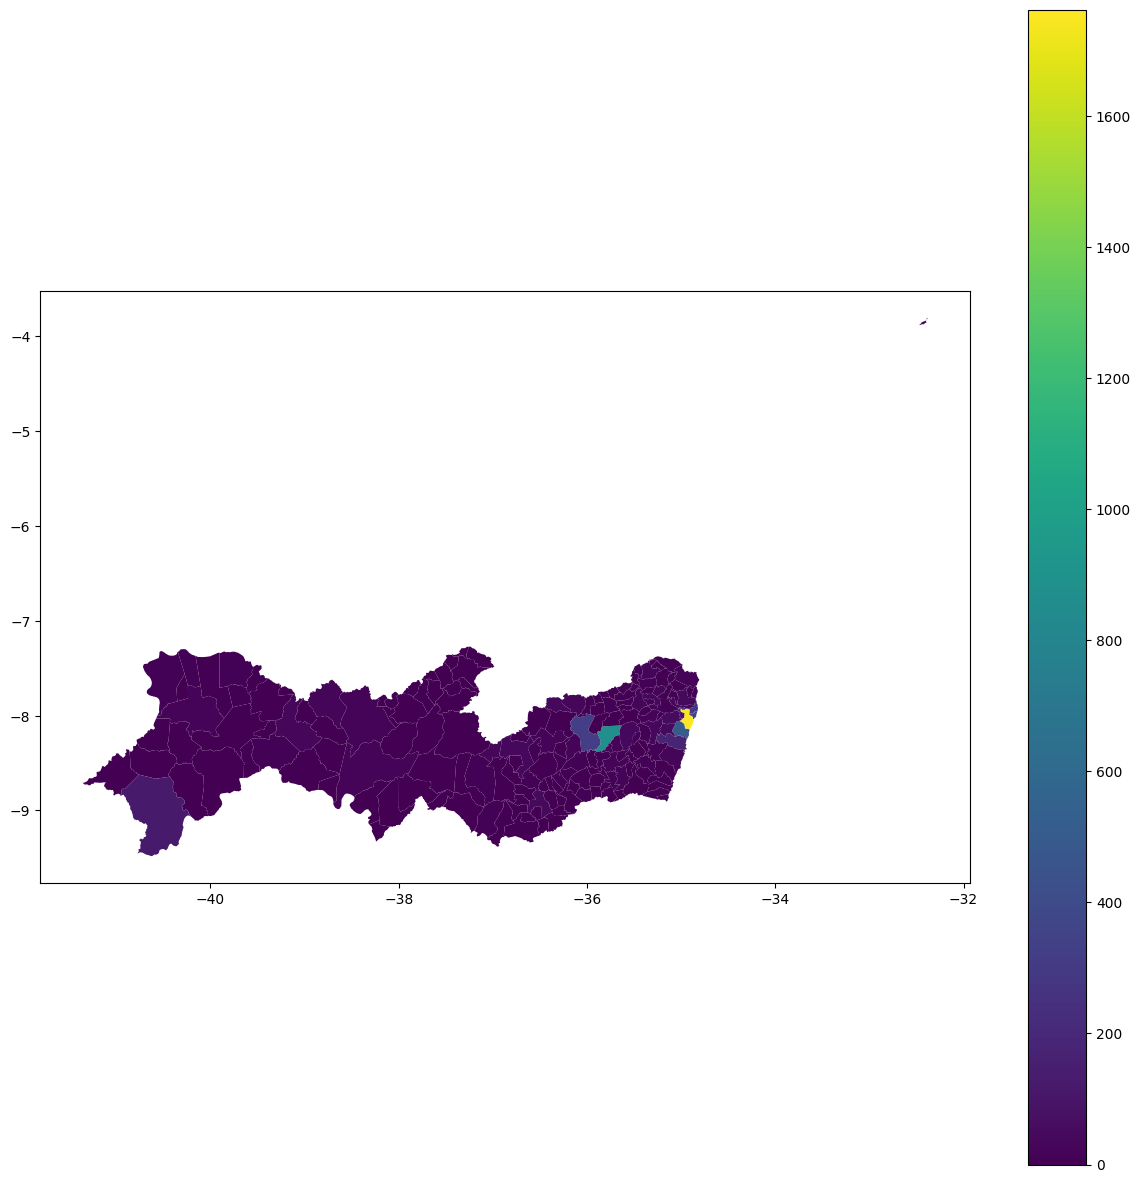

In [ ]:
cargo_turno_dict = {
    'Governador - 1o turno': (3, 1),
    'Governador - 2o turno': (3, 2),
    'Senador': (5, 1),
    'Deputado Federal': (6, 1),
    'Deputado Estadual': (7, 1)
}

# @title Selection and plotting
display_option = "por_partido" # @param ["total_votos","total_validos","percentual_validos","por_candidato","por_legenda", "por_partido"]
cargo_turno_option = "Deputado Estadual" # @param ["Governador - 1o turno", "Governador - 2o turno", "Senador", "Deputado Federal", "Deputado Estadual"]
partido_option = "PCB" # @param ['AGIR', 'AVANTE', 'CIDADANIA', 'DC', 'MDB', 'NOVO', 'PATRIOTA', 'PC do B', 'PCB', 'PCO', 'PDT', 'PL', 'PMB', 'PMN', 'PODE', 'PP', 'PROS', 'PRTB', 'PSB', 'PSC', 'PSD', 'PSDB', 'PSOL', 'PSTU', 'PT', 'PTB', 'PV', 'REDE', 'REPUBLICANOS', 'SOLIDARIEDADE', 'UNIÃO', 'UP']

# select data in such a way to only have one or zero rows per municipio
should_plot = False
column_to_plot = None

if display_option in ["total_votos", "total_validos", "percentual_validos"]:
  voto_data_select = voto_total_local[(voto_total_local['CD_CARGO'] == cargo_turno_dict[cargo_turno_option][0]) & (voto_total_local['NR_TURNO'] == cargo_turno_dict[cargo_turno_option][1])]
  if display_option == "total_votos":
    column_to_plot = 'QT_VOTOS_TOTAL'
  elif display_option == "total_validos":
    column_to_plot = 'QT_VOTOS_VALIDOS'
  elif display_option == "percentual_validos":
    column_to_plot = 'PERC_VOTOS_VALIDOS'
  should_plot = True
elif display_option in ["por_partido"]:
  voto_data_select = voto_PE_corr[(voto_PE_corr['CD_CARGO'] == cargo_turno_dict[cargo_turno_option][0]) & (voto_PE_corr['NR_TURNO'] == cargo_turno_dict[cargo_turno_option][1]) & (voto_PE_corr['NR_VOTAVEL'].astype(str).str[:2] == str(partido_key[partido_option]))]
  voto_data_select = voto_data_select.groupby(['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO'], as_index=False)['QT_VOTOS'].sum()
  should_plot = True
  display(voto_data_select)
  column_to_plot = 'QT_VOTOS'
else:
  print('not implememented yet')

if should_plot:
  try:
    import matplotlib.pyplot as plt
  except:
    !pip install matplotlib
    import matplotlib.pyplot as plt

  voto_total_display = malha_PE_mun.merge(voto_data_select, on='CD_MUN', how='outer').fillna(0)

  fig, ax = plt.subplots(figsize=(15, 15))
  voto_total_display.plot(ax=ax, column=column_to_plot, legend=True)
  plt.show()


In [ ]:
try:
  import matplotlib.pyplot as plt
except:
  !pip install matplotlib
  import matplotlib.pyplot as plt

voto_total_display = malha_PE_mun.merge(voto_total_local, on='CD_MUN', how='left')

cargos = [3, 5, 6, 7]

for cargo in cargos:

  voto_total_select = voto_total_display[(voto_total_display['NR_TURNO'] == 1) & (voto_total_display['CD_CARGO'] == cargo)]
  print(voto_total_select.shape)
  display(voto_total_select.head())

  # fig, ax = plt.subplots(figsize=(15, 15))
  # voto_total_select.plot(ax=ax, column='PERC_VOTOS_VALIDOS', legend=True)
  # plt.show()

(185, 8)


CD_MUN                                           geometry  \
0   2600054  POLYGON ((-34.92115 -7.92888, -34.92178 -7.929...   
5   2600104  POLYGON ((-37.60467 -7.86002, -37.60408 -7.861...   
10  2600203  POLYGON ((-41.04232 -8.78402, -41.04393 -8.784...   
15  2600302  POLYGON ((-35.94532 -8.53637, -35.9476 -8.5351...   
20  2600401  POLYGON ((-35.55924 -8.83185, -35.55924 -8.831...   

                   NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS_VALIDOS  \
0            ABREU E LIMA         3         1             58604   
5   AFOGADOS DA INGAZEIRA         3         1             18855   
10                AFRÂNIO         3         1             11896   
15              AGRESTINA         3         1             13544   
20             ÁGUA PRETA         3         1             13198   

    QT_VOTOS_TOTAL  PERC_VOTOS_VALIDOS  
0            68900           85.056604  
5            22443           84.012833  
10           13773           86.371887  
15           16452           82.324337  
20           15678           84.181656

(185, 8)


CD_MUN                                           geometry  \
2   2600054  POLYGON ((-34.92115 -7.92888, -34.92178 -7.929...   
7   2600104  POLYGON ((-37.60467 -7.86002, -37.60408 -7.861...   
12  2600203  POLYGON ((-41.04232 -8.78402, -41.04393 -8.784...   
17  2600302  POLYGON ((-35.94532 -8.53637, -35.9476 -8.5351...   
22  2600401  POLYGON ((-35.55924 -8.83185, -35.55924 -8.831...   

                   NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS_VALIDOS  \
2            ABREU E LIMA         5         1             53485   
7   AFOGADOS DA INGAZEIRA         5         1             17412   
12                AFRÂNIO         5         1             10961   
17              AGRESTINA         5         1             12145   
22             ÁGUA PRETA         5         1             11922   

    QT_VOTOS_TOTAL  PERC_VOTOS_VALIDOS  
2            68900           77.626996  
7            22443           77.583211  
12           13773           79.583243  
17           16452           73.820812  
22           15678           76.042863

(185, 8)


CD_MUN                                           geometry  \
3   2600054  POLYGON ((-34.92115 -7.92888, -34.92178 -7.929...   
8   2600104  POLYGON ((-37.60467 -7.86002, -37.60408 -7.861...   
13  2600203  POLYGON ((-41.04232 -8.78402, -41.04393 -8.784...   
18  2600302  POLYGON ((-35.94532 -8.53637, -35.9476 -8.5351...   
23  2600401  POLYGON ((-35.55924 -8.83185, -35.55924 -8.831...   

                   NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS_VALIDOS  \
3            ABREU E LIMA         6         1             58229   
8   AFOGADOS DA INGAZEIRA         6         1             20107   
13                AFRÂNIO         6         1             12628   
18              AGRESTINA         6         1             14017   
23             ÁGUA PRETA         6         1             13912   

    QT_VOTOS_TOTAL  PERC_VOTOS_VALIDOS  
3            68900           84.512337  
8            22443           89.591409  
13           13773           91.686633  
18           16452           85.199368  
23           15678           88.735808

(185, 8)


CD_MUN                                           geometry  \
4   2600054  POLYGON ((-34.92115 -7.92888, -34.92178 -7.929...   
9   2600104  POLYGON ((-37.60467 -7.86002, -37.60408 -7.861...   
14  2600203  POLYGON ((-41.04232 -8.78402, -41.04393 -8.784...   
19  2600302  POLYGON ((-35.94532 -8.53637, -35.9476 -8.5351...   
24  2600401  POLYGON ((-35.55924 -8.83185, -35.55924 -8.831...   

                   NM_MUN  CD_CARGO  NR_TURNO  QT_VOTOS_VALIDOS  \
4            ABREU E LIMA         7         1             58797   
9   AFOGADOS DA INGAZEIRA         7         1             20135   
14                AFRÂNIO         7         1             12386   
19              AGRESTINA         7         1             13706   
24             ÁGUA PRETA         7         1             13304   

    QT_VOTOS_TOTAL  PERC_VOTOS_VALIDOS  
4            68900           85.336720  
9            22443           89.716170  
14           13773           89.929572  
19           16452           83.309020  
24           15678           84.857762

# First plot of data

In [ ]:
# voto_PE_total = voto_PE_corr.groupby(['CD_MUNICIPIO', 'NM_MUNICIPIO', 'CD_CARGO', 'NR_TURNO'], as_index=False)['QT_VOTOS'].sum()
voto_PE_map = gpd.GeoDataFrame(pd.merge(malha_PE_abrev, voto_PE_corr, left_on='CD_MUN', right_on='CD_MUN', how='outer')).fillna(0)
voto_PE_map['TOTAL_VOTOS_LOCAL'] = voto_PE_map.groupby(['CD_MUN', 'NM_MUN', 'CD_CARGO', 'NR_TURNO'])['QT_VOTOS'].transform('sum')
# voto_PE_map['TOTAL_VOTOS_']

municipios_gt = malha_PE_abrev[['CD_MUN','NM_MUN']].drop_duplicates()


# display(voto_PE_map.sample(20))
voto_PE_map.columns

voto_PE_map_mun = voto_PE_map[['CD_MUN', 'NM_MUN', 'v0001', 'geometry',
       'NR_TURNO', 'CD_CARGO', 'NR_VOTAVEL','SQ_CANDIDATO', 'QT_VOTOS', 'TOTAL_VOTOS_LOCAL']].copy()

# voto_PE_select = voto_PE_total[(voto_PE_total['CD_CARGO'] == 3) & (voto_PE_total['NR_TURNO'] == 1)]

KeyError: 'NM_MUN'

In [ ]:
cargo_query = 6
turno_query = 1
nr_votavel_query = 4433

voto_PE_display_mun = voto_PE_map_mun[(voto_PE_map['CD_CARGO'] == cargo_query) & (voto_PE_map['NR_TURNO'] == turno_query) & (voto_PE_map['NR_VOTAVEL'] == nr_votavel_query)].copy()

missing_municipios = list(set(municipios_gt['CD_MUN']) - set(voto_PE_display_mun['CD_MUN']))

print(f'Municipios missing: {len(missing_municipios)}')

fill_municipios = []

for municipio in missing_municipios:
  municipio_data = voto_PE_map[voto_PE_map['CD_MUN'] == municipio].iloc[0]
  row = {
      'CD_MUN': municipio_data['CD_MUN'],
      'NM_MUN': municipio_data['NM_MUN'],
      'v0001': municipio_data['v0001'],
      'geometry': municipio_data['geometry'],
      'NR_TURNO': turno_query,
      'CD_CARGO': cargo_query,
      'NR_VOTAVEL': nr_votavel_query,
      'SQ_CANDIDATO': 0,
      'QT_VOTOS': 0,
      'TOTAL_VOTOS_LOCAL': municipio_data['TOTAL_VOTOS_LOCAL']
  }
  fill_municipios.append(row)

fill_municipios_df = pd.DataFrame(fill_municipios)

# display(fill_municipios_df)

voto_PE_display_mun = pd.concat([voto_PE_display_mun, fill_municipios_df], ignore_index=True)

voto_PE_display_mun['PERC_VOTOS'] = voto_PE_display_mun['QT_VOTOS'] / voto_PE_display_mun['TOTAL_VOTOS_LOCAL'] * 100
voto_PE_display_mun['INCID_VOTOS'] = voto_PE_display_mun['QT_VOTOS'] / voto_PE_display_mun['QT_VOTOS'].sum() * 100

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2,figsize=(30, 30))

voto_PE_display_mun.plot(ax=axes[0], column='INCID_VOTOS', legend=True)
voto_PE_display_mun.plot(ax=axes[1], column='PERC_VOTOS', legend=True)

# limit the axis coordinate-wise
# axes[0].set_xlim(voto_PE_display_mun.total_bounds[0],voto_PE_display_mun.total_bounds[2]-2)
# axes[0].set_ylim(voto_PE_display_mun.total_bounds[1],voto_PE_display_mun.total_bounds[3]-2)
# axes[1].set_xlim(voto_PE_display_mun.total_bounds[0],voto_PE_display_mun.total_bounds[2]-2)
# axes[1].set_ylim(voto_PE_display_mun.total_bounds[1],voto_PE_display_mun.total_bounds[3]-2)

plt.show()

NameError: name 'voto_PE_map_mun' is not defined